# Decision Trees in Machine Learning


This notebook demonstrates how to use **Decision Trees** for classification tasks in machine learning. 
Decision Trees are models that split data into subsets based on feature values, forming a tree structure 
that represents decision paths for each class. They are interpretable and powerful for both classification 
and regression tasks.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
sns.set(style="whitegrid")


# Decision Tree Notebook Explanation

This notebook demonstrates how to use **Decision Trees** for classification tasks, breaking down each step to show how the model is built, evaluated, and tuned. Here’s a detailed explanation of each section:

### 1. **Introduction to Decision Trees**
   - The notebook introduces decision trees, which split data into subsets based on feature values, forming a tree structure. Decision paths within this structure lead to specific class predictions, making decision trees intuitive and interpretable for both classification and regression tasks.

### 2. **Loading and Splitting the Dataset**
   - The **Iris dataset** is loaded using `load_iris()`, which contains measurements of iris flowers in three species. The dataset is split into **training** and **testing** sets using `train_test_split` from Scikit-Learn.
   - This step is essential to evaluate the model’s generalization performance by training on one portion of the data and testing on another.

### 3. **Training the Decision Tree Model**
   - A `DecisionTreeClassifier` model is created and trained on the training data with a maximum depth of 3 (`max_depth=3`). Limiting the depth is a form of **regularization** that prevents the tree from growing too complex, which can reduce overfitting.
   - After training, predictions are made on the test set. The accuracy is then calculated to assess the model's performance.

### 4. **Visualizing the Decision Tree Structure**
   - Using `plot_tree` from Scikit-Learn, the structure of the trained decision tree is visualized, showing the splits and decision paths.
   - The tree diagram displays:
      - **Feature splits** at each node (e.g., “petal length (cm) <= 2.45”).
      - **Gini impurity** values, which measure the “purity” of each node (lower values mean nodes are more pure).
      - **Samples** count, which indicates how many data points fall into each node.
      - **Class predictions** at the leaf nodes, which represent the predicted species based on the path through the tree.
   - This visualization helps interpret the decision-making process of the model.

### 5. **Model Performance Metrics**
   - The **classification report** provides detailed metrics on model performance, such as:
     - **Precision** (how many positive predictions were correct),
     - **Recall** (how many actual positives were identified),
     - **F1 Score** (the harmonic mean of precision and recall), and
     - **Support** (number of actual occurrences for each class).
   - This report helps diagnose how well the model performs on each class, providing a comprehensive view beyond overall accuracy.

### 6. **Hyperparameter Tuning: Adjusting Tree Depth**
   - In this section, the notebook demonstrates **hyperparameter tuning** by testing different values for the `max_depth` parameter to see how tree depth affects accuracy.
   - For each depth from 1 to 10, a new tree is trained, and accuracy is calculated on the test set. Results are stored and then visualized in a line plot showing accuracy as a function of tree depth.
   - This plot reveals the **bias-variance trade-off**:
     - **Low depths** might result in high bias, underfitting the data.
     - **High depths** might result in high variance, overfitting the training data.
   - By examining this plot, you can find an optimal depth that balances accuracy with generalization.

### 7. **Summary**
   - The notebook concludes with a summary explaining the steps taken and the importance of tuning model parameters like `max_depth` to balance model complexity.
   - Decision Trees are versatile and interpretable, but tuning is essential to maximize performance without overfitting.


## Load Dataset and Split Data

In [2]:

# Load the dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Training a Decision Tree Model

In [3]:

# Train a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limit depth for simplicity
tree.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")


Decision Tree Accuracy: 1.00


## Visualizing the Decision Tree Structure

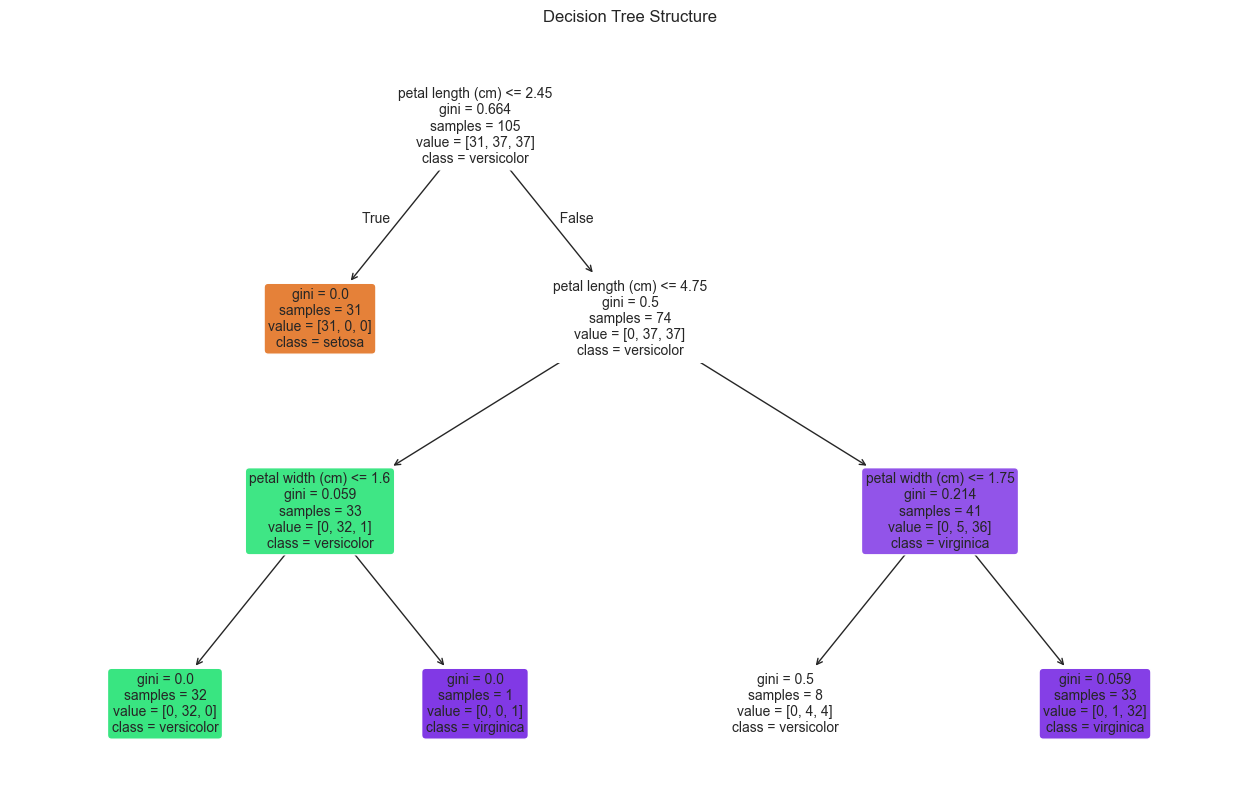

In [4]:

# Visualize the decision tree structure
plt.figure(figsize=(16, 10))
plot_tree(tree, feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()


## Model Performance Metrics

In [5]:

# Display classification report for detailed performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Hyperparameter Tuning: Adjusting Tree Depth

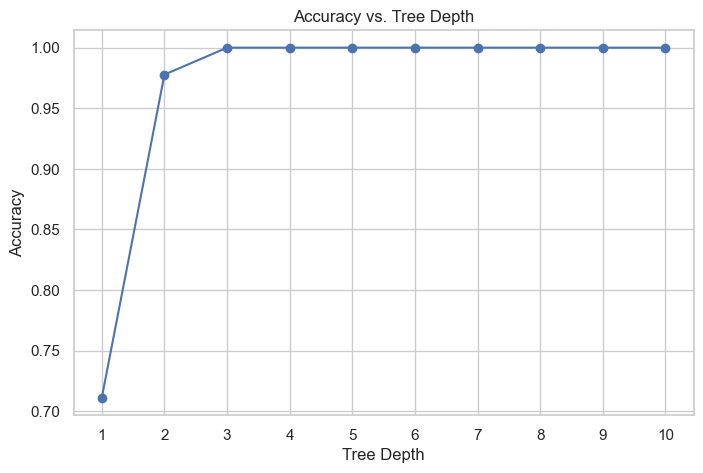

In [6]:

# Test accuracy with different depths
depths = range(1, 11)
accuracies = []

for depth in depths:
    tree_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_temp.fit(X_train, y_train)
    y_pred_temp = tree_temp.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_temp))

# Plot accuracy vs. depth
plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies, marker='o', color='b')
plt.title("Accuracy vs. Tree Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.xticks(depths)
plt.grid(True)
plt.show()



### Summary
This notebook demonstrated how to use a Decision Tree for classification on the Iris dataset. We trained a model, visualized 
its structure, evaluated its performance, and explored how the depth of the tree affects accuracy. Decision Trees are 
interpretable models that can be tuned effectively with hyperparameters like `max_depth` to prevent overfitting or underfitting.
